# Obtención de una matriz de confusión desde una base de datos

Paso 0: importamos las librerías a utilizar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

Paso 1: extraemos la data 

In [3]:
mnist = fetch_openml("mnist_784")

In [3]:
print(f"las dimensiones de la data son: {mnist['data'].shape}")
print(f"las dimensiones del target son: {mnist['target'].shape}")

las dimensiones de la data son: (70000, 784)
las dimensiones del target son: (70000,)


Paso 2: extraemos los datos de entrenamiento y validación

In [4]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist['data'], mnist['target'], test_size=0.2, random_state=0)

In [5]:
print(f"las dimensiones de train_img: {train_img.shape}")
print(f"las dimensiones de test_img: {test_img.shape}")
print(f"las dimensiones de train_lbl: {train_lbl.shape}")
print(f"las dimensiones de test_lbl: {test_lbl.shape}")

las dimensiones de train_img: (56000, 784)
las dimensiones de test_img: (14000, 784)
las dimensiones de train_lbl: (56000,)
las dimensiones de test_lbl: (14000,)


Paso 3: entrenamos el modelo de regresión logística

In [6]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [19]:
model.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model.coef_.shape #10 clases de 784 valores

(10, 784)

In [21]:
model.intercept_.shape #sacamos el Bias

(10,)

Paso 4: predecimos el modelo

In [68]:
print(f"los 20 primeros valores del test_img:{model.predict(test_img[:20])}") 
print(f"los 20 primeros valores del test_lbl:{(test_lbl[:20])}") 

los 20 primeros valores del test_img:['0' '4' '1' '2' '4' '9' '7' '1' '1' '3' '1' '3' '4' '2' '6' '4' '6' '7'
 '9' '3']
los 20 primeros valores del test_lbl:['0' '4' '1' '2' '7' '9' '7' '1' '1' '7' '1' '3' '4' '2' '6' '4' '6' '7'
 '3' '3']


Paso 5: calculamos la precisión del modelo

In [71]:
score = model.score(test_img, test_lbl) 
print("la prediccion tiene un porcentaje del: {}%".format(np.round(score*100,2)))

la prediccion tiene un porcentaje del: 91.11%


Paso 6: determinamos la matriz de confusión

In [72]:
from sklearn.metrics import confusion_matrix 

In [75]:
y_pred = model.predict(test_img) #salida de prediccion

#matriz de confusion
cm = confusion_matrix(test_lbl, y_pred) 
print(cm)

[[1339    0    7    1    2   12   15    4    5    2]
 [   0 1533    7    6    2    5    2    5   18    2]
 [  11   19 1283   23   20    5   19   16   43    4]
 [   3    5   49 1262    1   46    1   13   40   15]
 [   2    3    6    5 1244    5   17   13    8   47]
 [  15    7   18   44   10 1049   25    4   45   14]
 [  19    5   14    3   17   20 1300    1    7    1]
 [   4    6   21    9   11    3    1 1330   11   62]
 [   5   26   11   32    9   42   16    4 1206   17]
 [   5    5    7   16   49    9    1   43   17 1209]]


In [77]:
import seaborn as sns

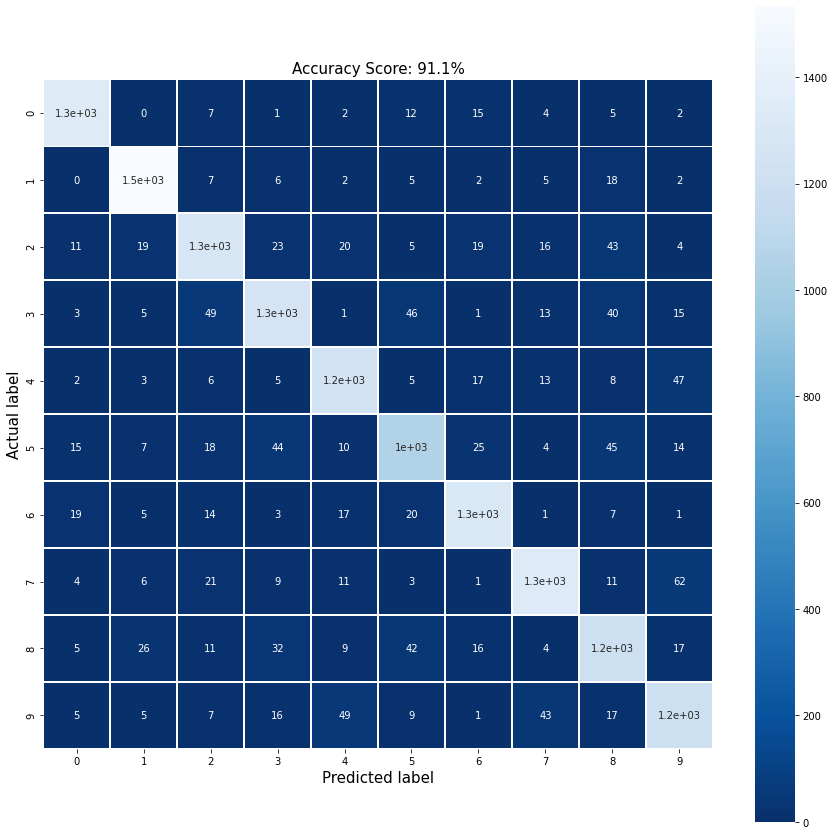

In [79]:
plt.figure(figsize=(15,15)) #tamaño de la figura
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r'); #mostrar mapa de calor de cm
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score,1)}%', size = 15)
plt.show()